In [1]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [75]:
phase2_collection = unpickle_this('phase2collection.pkl')

pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection,
                                                  timebin = 100,
                                                  ignore_freq =  0.5,
                                                  smoothing_window = 500)

All set to analyze


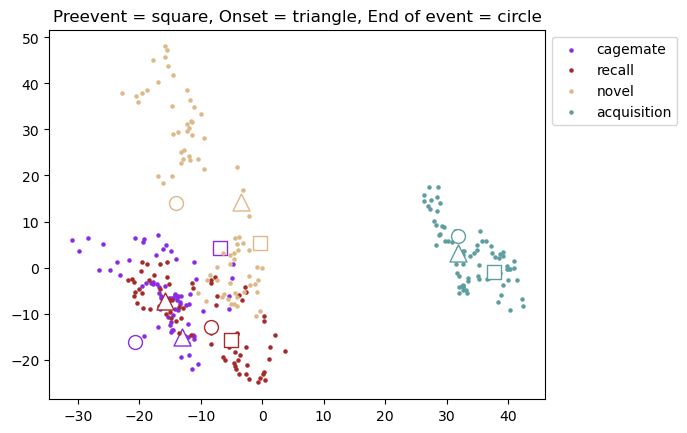

0.3333572961956799
0.5042719695568105
0.6059003665167886
0.6567486861409345
0.7054313861724503
0.7420954164118407
0.7696312210862857
0.7934206077775204
0.8137215515122643
0.8300150587523406
0.843794844849578
0.8561358918065706
0.8664747963203863
0.8764498245769692
0.8851745572798639
0.8931696847349901
0.9006433818978771


In [89]:
pca_df, coeff, var = pca_analysis.PCA_trajectories(4, 4, events = ['cagemate', 'recall', 'novel', 'acquisition'], azim = 0, elev = 40)
#eo_dis = pca_analysis.LOO_PCA(2, 2, 0.9, events = ['acquisition', 'recall', 'cagemate', 'novel'])
#var[0:3]
total_var = 0
for varl in var[0:17]: 
    total_var =+ total_var + varl
    print(total_var)


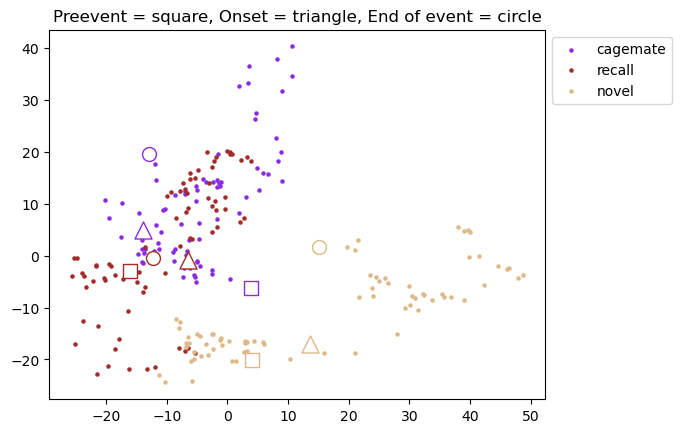

0.26196028122130766
0.4398645906599731
0.51808054012572
0.5921526336629842
0.6451106415287231
0.6853499841301698
0.7211184284219911
0.7460347830585868
0.7691683685718627
0.7902679128940922
0.8080655729295427
0.8231497528887239
0.8380204146831103
0.8514039656388919
0.862791490286412
0.8734188289021354
0.8832841564988593
0.8919732635756897
0.8992201430689808
0.9057840973940684


In [83]:
pca_df, coeff, var = pca_analysis.PCA_trajectories(4, 4, events = ['cagemate', 'recall', 'novel'], azim = 0, elev = 40)
#eo_dis = pca_analysis.LOO_PCA(2, 2, 0.9, events = ['acquisition', 'recall', 'cagemate', 'novel'])
#var[0:3]
total_var = 0
for varl in var[0:20]: 
    total_var =+ total_var + varl
    print(total_var)

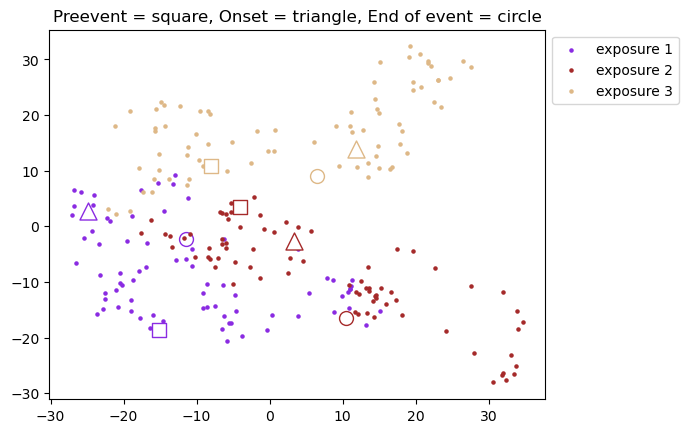

0.24600015828148725
0.4426928915735419
0.5264245739711337
0.5985495510610316
0.659878324390112
0.6956405780331574
0.728294162438625
0.7553364051863241
0.7753053592955655
0.7941099749575238
0.8109545407224797
0.8269318339281111
0.841497840088495
0.8545608923514455
0.8659546215288468
0.8757769074584828
0.8836417315055043
0.8910313333618954
0.8983004402552279
0.9048283012261801


In [85]:
pca_df, coeff, var = pca_analysis.PCA_trajectories(4, 4, events = ['exposure 1', 'exposure 2', 'exposure 3'], azim = 0, elev = 40)
#eo_dis = pca_analysis.LOO_PCA(2, 2, 0.9, events = ['acquisition', 'recall', 'cagemate', 'novel'])
#var[0:3]
total_var = 0
for varl in var[0:20]: 
    total_var =+ total_var + varl
    print(total_var)

In [ ]:
pca_df, coeff, var = pca_analysis.PCA_trajectories(5, 5, d = 2, events = ['novel', 'acquisition'])

pca_df, coeff, var = pca_analysis.PCA_trajectories(5, 5, d = 2, events = ['recall', 'acquisition'])

In [ ]:
pca_df, coeff, var = pca_analysis.PCA_trajectories(2, 2, d = 3, events = ['exposure 1', 'exposure 2', 'exposure 3', 'acquisition'])
pca_df, coeff, var = pca_analysis.PCA_trajectories(2, 2, events = ['exposure 1', 'exposure 2', 'exposure 3', 'acquisition'])
order_distances = pca_analysis.avg_geo_dist(2, 2, .9, post_window = 0, events =['exposure 1', 'exposure 2', 'exposure 3', 'acquisition'])

# Plotting

In [ ]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, 100,50,0.5)
pca_df, coeff, var = pca_analysis.PCA_trajectories(2, 2, d = 3, events = ['cagemate', 'recall', 'novel', 'acquisition'], plot = False)
PCA_matrix = pca_df
PCA_key = ['cagemate','recall', 'novel', 'acquisition']
equalize = 2
pre_window =2
post_window = 0
azim=45
elev=20
timebin = 50
color_id_dict = {'acquisition\n(exposure 1)': hex_2_rgb('#001424'), 'novel': hex_2_rgb('#15616F'), 
                'short-term familiar\n(exposure 2)': (1.0, 0.6862745098039216, 0.0), 'long-term familiar': hex_2_rgb('#792910')}

event_lengths = int(
            (equalize + pre_window + post_window) * 1000 / timebin
        )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), hex_2_rgb('#001424')]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
counter = 0 
for i in range(0, len(PCA_key)*event_lengths, event_lengths):
    event_label = PCA_key[counter]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=5,
        color=colors[counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        color="w",
        edgecolors=colors[counter],
    )
    counter += 1
ax.set_xlabel("\nPC1 (58% of variance)", fontsize = 14)
ax.set_ylabel("\nPC2 (24% of variance)", fontsize = 14)
ax.set_zlabel("\nPC3 (12% of variance)", fontsize = 14)
ax.tick_params(labelsize = 12)
ax.view_init(azim = 40, elev = 20
    )
ax.set_xlim(-20, 25)
ax.set_ylim(-15, 20)
ax.set_zlim(-10, 15)
id_labels = [plt.Line2D([0], [0], marker = 'o', color=color_id_dict[label], lw=0, label=label) for label in color_id_dict]
legend_labels = id_labels
ax.legend(loc="upper left", bbox_to_anchor=(1, .80), frameon = False, 
fontsize = 14, markerscale = 2, handles = legend_labels)
plt.title('Freely Moving', fontsize = 18, y = 1, x = .5)
plt.show()

#[0.58783251, 0.21168139, 0.12948744])

# Geodesic Distances 

In [90]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, timebin = 100,ignore_freq = 0.5, smoothing_window = 500)
avg_geo_dis = pca_analysis.avg_geo_dist(4,4, 0.9,events = ['acquisition', 'recall', 'cagemate', 'novel'] )
avg_geo_dis_df = pd.DataFrame.from_dict(avg_geo_dis)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_dis_df.columns.to_list()
avg_geo_dis_df.columns = ['acq vs cagemate', 'acq vs nov', 'acq vs recall', 'cage vs novel', 'cage vs recall', 'nov vs recall']
avg_vals = avg_geo_dis_df.mean()
avg_vals

All set to analyze


acq vs cagemate    1375.899069
acq vs nov         1448.512452
acq vs recall      1372.553149
cage vs novel       959.908145
cage vs recall     1020.367192
nov vs recall      1069.086053
dtype: float64

In [91]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, timebin = 100,ignore_freq = 0.5, smoothing_window = 500)
avg_geo_dis = pca_analysis.avg_geo_dist(4,4, 0.9,events = ['recall', 'cagemate', 'novel'] )
avg_geo_dis_df = pd.DataFrame.from_dict(avg_geo_dis)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_dis_df.columns.to_list()
avg_geo_dis_df.columns = ['cage vs novel', 'cage vs recall', 'nov vs recall']
avg_vals = avg_geo_dis_df.mean()
avg_vals

All set to analyze


cage vs novel      988.550377
cage vs recall    1052.335720
nov vs recall     1101.573818
dtype: float64

## Plotting

In [ ]:
data =[[0, 773.5, 545.5, 1220.5],
       [773.5, 0, 753.9, 1234.5],
       [545.5, 753.9, 0, 1255.7],
       [1220.5, 1234.5, 1255.7, 0]]




plt.figure(figsize=(4,3))
col_pal = sns.dark_palette("#FFAF00", reverse=True, as_cmap=True)
heatmap = sns.heatmap(data, cmap=col_pal, annot=True, fmt = '.2f', vmin = 500)  # 'd' for integer format
heatmap.set_xticklabels(['Long-term', 'Short-term', 'Novel', 'Acquisition'], fontsize = 12, rotation = 45)
heatmap.set_yticklabels(['Long-term', 'Short-term', 'Novel', 'Acquisition'], fontsize = 12, rotation = 0)
heatmap.xaxis.set_ticks_position('top')
plt.title('Geodesic distances with 3 PCs (>90% variance)')

## Stats

In [ ]:
p_values = pd.DataFrame(index=avg_geo_dis_df.columns, columns=avg_geo_dis_df.columns)
for group1 in avg_geo_dis_df.columns:
    for group2 in avg_geo_dis_df.columns:
        if group1 != group2:
            t_stat, p_value = stats.ttest_ind(avg_geo_dis_df[group1], avg_geo_dis_df[group2])
            p_values.at[group1, group2] = p_value
p_values

In [ ]:
order_distances_df = pd.DataFrame.from_dict(order_distances)
avg_order_distances = order_distances_df.mean()
avg_order_distances

In [ ]:

data = [[0, 569, 777, 1148],
        [569, 0, 747, 1286],
        [777, 747, 0 , 1253],
        [1148, 1286, 1253, 0]]
plt.figure(figsize=(4,3))
col_pal = sns.dark_palette("#5BC", reverse=True, as_cmap=True)
heatmap = sns.heatmap(data, cmap=col_pal, annot=True, fmt = '.2f', vmin = 500)  # 'd' for integer format
heatmap.set_xticklabels(['Acquisition','Exposure 1', 'Exposure 2', 'Exposure 3'], fontsize = 12, rotation = 45)
heatmap.set_yticklabels(['Acquisition','Exposure 1', 'Exposure 2', 'Exposure 3'], fontsize = 12, rotation = 0)
heatmap.xaxis.set_ticks_position('top')
plt.title('Geo distances based on exposure order', fontsize = 16)
plt.show()

In [ ]:
average_values = geo_dis_df.mean()
sems = geo_dis_df.sem()
plt.bar(['Acquisition vs Cagemate', 'Acquisition vs Novel',
         'Acquisition vs Familiar', 'Cagemate vs Novel', 'Cagemate vs Familiar',
         'Novel vs Familiar'], average_values, yerr=sems, capsize=5)

# Label the x-axis and y-axis
plt.ylabel('Geodesic Distance')
plt.xticks(rotation = 45)
# Show the plot
plt.show()
